<a href="https://colab.research.google.com/github/henryezikeai/Loan-Approval/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Approval Prediction

The primary goal of this project is to automate the approval or denial of a loan based on the details that is to be provided by the customer during loan application.

##Expected Result

A Machine Learning model with good performance for predicting loan approval.

##Author

- Henry C. Ezike


In [1]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Import all the necessary tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
filepath = "/content/drive/MyDrive/ML Projects (Personal)/loan_prediction.csv"

In [3]:
#Load the data in Pandas Dataframe.
df = pd.read_csv(filepath)

#Perform Exploratory Data Analysis

In [4]:
#Preview the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Preview the number of rows and columns.
df.shape

(614, 13)

In [6]:
#Check to see if data contains null values.
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [8]:
#Print out the value counts for each column to check for inconsistent data
for column in df.columns:
  print(f"{df[column].value_counts()} \n \n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 
 

Male      489
Female    112
Name: Gender, dtype: int64 
 

Yes    398
No     213
Name: Married, dtype: int64 
 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 
 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 
 

No     500
Yes     82
Name: Self_Employed, dtype: int64 
 

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 
 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 
 

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1

In [9]:
#Change categorical to numeric data so we can view correlation on heatmap.
df['Education'] = df['Education'].replace({"Graduate": 1, "Not Graduate":0})
df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1, "No":0})
df['Married'] = df['Married'].replace({"Yes":1, "No":0})
df['Gender'] = df['Gender'].replace({"Male":1, "Female":0})

#Drop Loan_ID column because it is not relevant

#Make the dependent column a numeric column
df['Dependents'] = df['Dependents'].replace("3+", 3)
df['Dependents'] = df['Dependents'].astype('float')


In [10]:
df['Loan_Status'] = df['Loan_Status'].replace({"Y":1, "N":0})

In [11]:
df['Dependents'].dtype

dtype('float64')

In [12]:
df['Loan_Status'].dtype

dtype('int64')

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


#Visualization of the Data


In [14]:
corr = df.corr()

<ipython-input-14-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

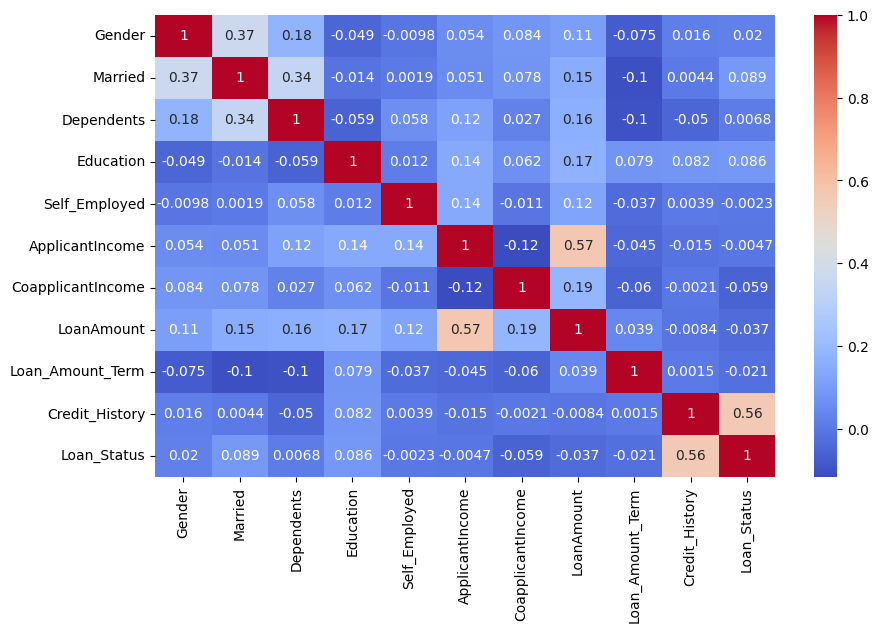

In [15]:
#Plot a heatmap to visualize correlation between features.
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

- From the above heatmap visualization, we can see that there is a strong positive correlation between the applicants credit history and if the applicant gets approved or not approved. This is the major factor that influences the loan status (Approval or Denial).

- There's also a small positive correlation between Education and if a loan gets approved.

- There is also a very strong positive correlation between Applicant's income and the loan amount.



#Data PreProcessing.

In [16]:
#Split the data
y = df["Loan_Status"]
X = df.drop(columns="Loan_Status")

In [17]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [18]:
#Define Numeric column for SimpleImputer
numeric_cols = X_train.select_dtypes("number").columns
numeric_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [19]:

#Instantiate SimpleImputer
imputer = SimpleImputer(strategy='median')

#Instantiate Standard Scaler
scaler = StandardScaler()

#Create pipeline for SimpleImputer and StandardScaler 😏
numeric_pipe = make_pipeline(imputer, scaler)
numeric_pipe
numeric_tuple = ('numeric', numeric_pipe, numeric_cols)

In [20]:
#Preprocess Categorical Data
categorical_column = X_train.select_dtypes("object").columns


In [21]:
cat_imputer = SimpleImputer(strategy ='constant', fill_value="NA")
cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_pipe = make_pipeline(cat_imputer, cat_encoder)
categorical_pipe
categorical_tuple = ('categorical', categorical_pipe, categorical_column)

In [22]:
from sklearn.compose import ColumnTransformer
#Instantiate Preprocessor
preprocessor = ColumnTransformer([numeric_tuple, categorical_tuple])

In [23]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Loan_ID', 'Property_Area'], dtype='object'))])

In [24]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, test_predictions))

In [25]:
from sklearn.svm import SVC
svc_model = SVC(random_state=42)
svc_pipe = make_pipeline(preprocessor, svc_model)
svc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Loan_ID', 'Property_Area'], dtype='object'))])),
                ('svc', SVC(random_state=42))])

In [26]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Loan_ID', 'Property_Area'], dtype='object'))])),
                ('svc', SVC(random_state=42))])

In [27]:
train_predictions_svc = svc_pipe.predict(X_train)
test_predictions_svc = svc_pipe.predict(X_test)

In [28]:
print(classification_report(y_test, test_predictions_svc))

              precision    recall  f1-score   support

           0       0.95      0.39      0.55        54
           1       0.75      0.99      0.85       100

    accuracy                           0.78       154
   macro avg       0.85      0.69      0.70       154
weighted avg       0.82      0.78      0.75       154



In [29]:
test_predictions_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [30]:
import xgboost as xgb

In [31]:
xgb_model = xgb.XGBClassifier()

In [32]:
xgb_pipe = make_pipeline(preprocessor, xgb_model)
xgb_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='obj...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [33]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='obj...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [35]:
train_predictions_xgb = xgb_pipe.predict(X_train)
test_predictions_xgb = xgb_pipe.predict(X_test)

In [36]:
print(classification_report(y_test, test_predictions_xgb))

              precision    recall  f1-score   support

           0       0.72      0.48      0.58        54
           1       0.76      0.90      0.83       100

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



In [37]:
test_predictions_xgb

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])